In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
path = '/Users/luobingqiao/Desktop/BT4222/project/data/'

# Combine Data

In [3]:
dates = ['2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
         '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-10', '2020-11', '2020-12']

In [4]:
calendars = []

In [5]:
for date in dates:
    # print(date)
    calendar = pd.read_csv(path+date+'/calendar.csv')
    calendars.append(calendar)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (42,43,61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
calendars_full = calendars[0]
for i in range(1, 19):
    calendars_full = pd.concat([calendars_full, calendars[i]])

In [28]:
calendars_full.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49091,2019-03-18,t,$81.00,$81.00,180.0,360.0
1,49091,2019-03-19,t,$81.00,$81.00,180.0,360.0
2,49091,2019-03-20,t,$81.00,$81.00,180.0,360.0
3,49091,2019-03-21,t,$81.00,$81.00,180.0,360.0
4,49091,2019-03-22,t,$81.00,$81.00,180.0,360.0


In [29]:
calendars_full.shape

(50721752, 7)

In [30]:
calendars_full['price'].isnull().value_counts()

False    50718004
True         3748
Name: price, dtype: int64

In [31]:
calendars_full['adjusted_price'].isnull().value_counts()

False    50718004
True         3748
Name: adjusted_price, dtype: int64

In [32]:
# drop duplicate rows & do not have price data
calendars_full = calendars_full.drop_duplicates()
calendars_full = calendars_full.dropna(subset = ['price'])

In [33]:
calendars_full.shape

(21193818, 7)

In [34]:
calendars_full.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,49091,2019-03-18,t,$81.00,$81.00,180.0,360.0
1,49091,2019-03-19,t,$81.00,$81.00,180.0,360.0
2,49091,2019-03-20,t,$81.00,$81.00,180.0,360.0
3,49091,2019-03-21,t,$81.00,$81.00,180.0,360.0
4,49091,2019-03-22,t,$81.00,$81.00,180.0,360.0


### EDA 3.2: Prices of Accommodations Rise During the December-February Period

In [36]:
calendars_full['month'] = calendars_full['date'].apply(lambda x: x[0:7])

In [37]:
calendars_full['month'].value_counts()
# 有一点点困惑这里为什么会有2021和2022的data

2020-03    1099351
2020-05    1065684
2020-04    1042684
2020-01    1024282
2020-06    1008412
2019-12     995527
2020-07     960830
2020-02     960616
2020-08     874499
2019-11     867051
2019-10     825844
2020-09     773803
2020-12     759264
2020-11     755403
2020-10     750601
2021-01     719878
2019-09     715600
2019-08     628955
2021-02     586591
2019-07     579298
2021-03     556454
2021-04     474033
2019-06     454794
2021-05     441153
2019-05     379309
2021-06     330095
2019-04     281928
2021-08     218862
2021-07     216986
2021-10     212395
2021-09     211584
2021-11     173030
2021-12     134636
2019-03     111622
2022-01       2764
Name: month, dtype: int64

In [38]:
calendars_full['price'] = calendars_full['price'].apply(lambda x: int(x[1:-3].replace(',', '')))

In [39]:
# get mean price of each month
calendars_mean = calendars_full[['listing_id', 'month', 'price']].groupby(['listing_id','month']).mean()
calendars_mean_df = pd.DataFrame(calendars_mean)
calendars_mean_df.rename(columns = {'price': 'mean_price'}, inplace = True)
calendars_mean_df.reset_index(inplace = True)

In [40]:
calendars_mean_df.head()

,listing_id,month,mean_price
0,49091,2019-03,81.00
1,49091,2019-04,81.00
2,49091,2019-05,81.45
3,49091,2019-06,82.00
4,49091,2019-07,82.00


In [41]:
# create new column previous_listing_id
calendars_mean_df['previous_listing_id'] = calendars_mean_df['listing_id'].shift(1)
calendars_mean_df['previous_listing_id'][0] = 0
calendars_mean_df['previous_listing_id'] = calendars_mean_df['previous_listing_id'].apply(lambda x: int(x))
# create new column previous_mean_price
calendars_mean_df['previous_mean_price'] = calendars_mean_df['mean_price'].shift(1)
calendars_mean_df['previous_mean_price'][0] = calendars_mean_df['mean_price'][0]
# create new column diff_mean_price: difference between this month's mean_price to last month's
calendars_mean_df['diff_mean_price'] = 0
calendars_mean_df['diff_mean_price'] = calendars_mean_df.apply(
    lambda row: row.mean_price - row.previous_mean_price if row.listing_id == row.previous_listing_id else 0, axis=1)
# create new column change_price_perc 
calendars_mean_df['change_price_perc'] = calendars_mean_df['diff_mean_price']/calendars_mean_df['previous_mean_price']

<ipython-input-41-1a1a625bd402>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  calendars_mean_df['previous_listing_id'][0] = 0
<ipython-input-41-1a1a625bd402>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  calendars_mean_df['previous_mean_price'][0] = calendars_mean_df['mean_price'][0]


In [42]:
calendars_mean_df.head()

,listing_id,month,mean_price,previous_listing_id,previous_mean_price,diff_mean_price,change_price_perc
0,49091,2019-03,81.00,0,81.00,0.00,0.000000
1,49091,2019-04,81.00,49091,81.00,0.00,0.000000
2,49091,2019-05,81.45,49091,81.00,0.45,0.005556
3,49091,2019-06,82.00,49091,81.45,0.55,0.006753
4,49091,2019-07,82.00,49091,82.00,0.00,0.000000


In [43]:
# get mean change of mean_price of each month (group by month)
calendars_change = calendars_mean_df[['month', 'change_price_perc']].groupby(['month']).mean()
calendars_change_df = pd.DataFrame(calendars_change)
calendars_change_df.rename(columns = {'change_price_perc': 'mean_change_price_perc'}, inplace = True)
calendars_change_df.reset_index(inplace = True)

In [47]:
calendars_change_df.head()

,month,mean_change_price_perc
0,2019-03,0.000000
1,2019-04,0.012830
2,2019-05,0.001445
3,2019-06,0.012955
4,2019-07,0.012100


Text(0, 0.5, 'Price Fluctuation')

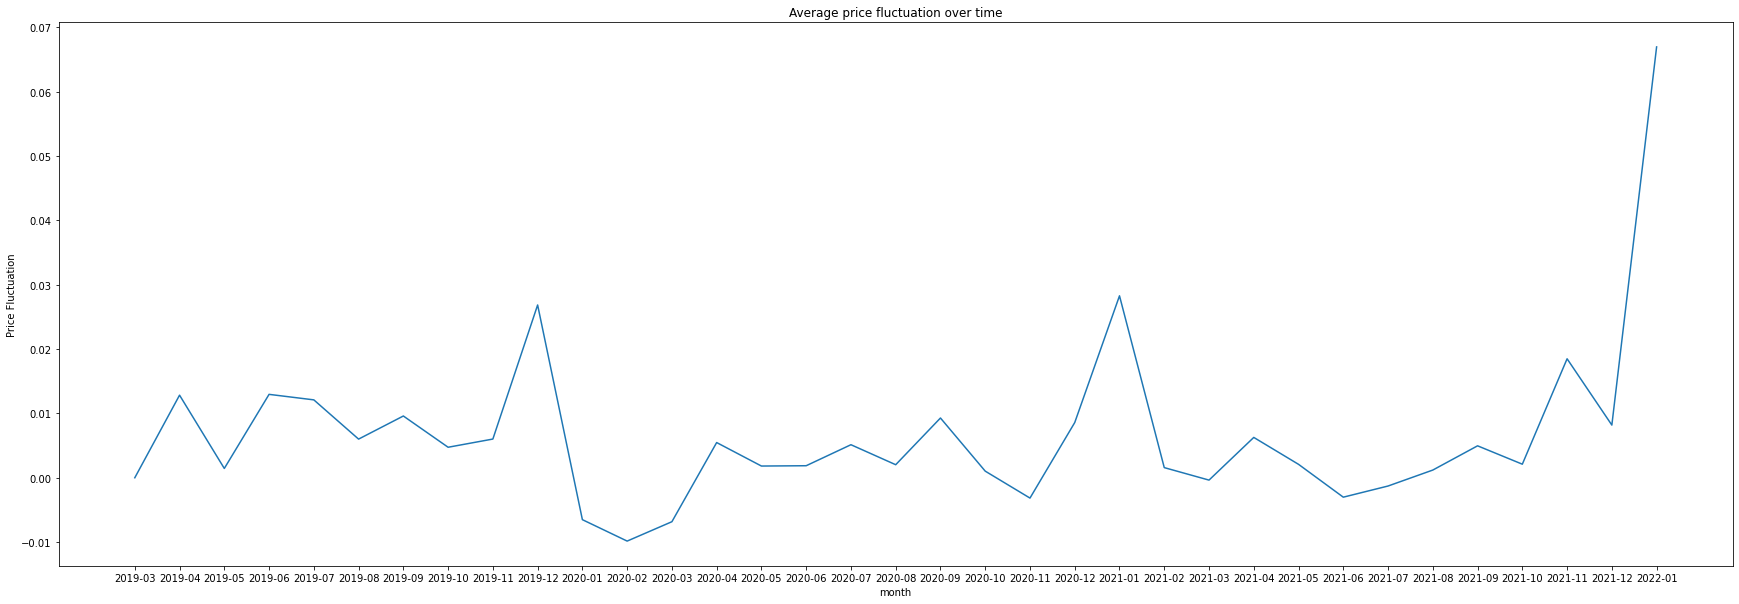

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.plot('month', 'mean_change_price_perc', data = calendars_change_df)
plt.title('Average price fluctuation over time')
plt.xlabel('month')
plt.ylabel('Price Fluctuation')